In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
os.listdir()

In [18]:
#DataLoading
taxi_fare=pd.read_csv(r"TaxiFare.csv")
taxi_fare.head().T

,0,1,2,3,4
unique_id,26:21.0,52:16.0,35:00.0,30:42.0,51:00.0
amount,4.5,16.9,5.7,7.7,5.3
date_time_of_pickup,2009-06-15 17:26:21 UTC,2010-01-05 16:52:16 UTC,2011-08-18 00:35:00 UTC,2012-04-21 04:30:42 UTC,2010-03-09 07:51:00 UTC
longitude_of_pickup,-73.844311,-74.016048,-73.982738,-73.98713,-73.968095
latitude_of_pickup,40.721319,40.711303,40.76127,40.733143,40.768008
longitude_of_dropoff,-73.84161,-73.979268,-73.991242,-73.991567,-73.956655
latitude_of_dropoff,40.712278,40.782004,40.750562,40.758092,40.783762
no_of_passenger,1,1,2,1,1


In [19]:
taxi_fare.info()     #Total 8columns, 50000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [99]:
taxi_fare.isnull().sum().sort_values(ascending=False)

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
date_time_pickup        0
pickup_dayofweek        0
pickup_day_no           0
pickup_hour             0
total_distance          0
dtype: int64

- **No missing value**

from the above analysis, we ca say that in a taxi  min 0 and max 6 passengers can travel. 
And the taxi fare could be variate from 3 to 200 dollars. 

## Feature Enigneering 

In [20]:
taxi_fare["date_time_pickup"]=pd.to_datetime(taxi_fare["date_time_of_pickup"])
taxi_fare["pickup_dayofweek"]=taxi_fare["date_time_pickup"].dt.day_name()
taxi_fare["pickup_day_no"]=taxi_fare["date_time_pickup"].dt.weekday
taxi_fare["pickup_hour"]=taxi_fare["date_time_pickup"].dt.hour
taxi_fare["total_distance"]=np.sqrt((taxi_fare["longitude_of_dropoff"]-taxi_fare["longitude_of_pickup"])**2+(taxi_fare["latitude_of_dropoff"]-taxi_fare["latitude_of_pickup"])**2)

In [21]:
taxi_fare["pickup_month"]=taxi_fare["date_time_pickup"].dt.month
taxi_fare["day_of_month"]=taxi_fare["date_time_pickup"].dt.day
taxi_fare["year"]=taxi_fare["date_time_pickup"].dt.year


In [22]:
taxi_fare["Is_it_Weekend"]=np.where(taxi_fare["pickup_day_no"].isin([5,6]),1,0)
taxi_fare["Is_Starting_month"]=np.where(taxi_fare["day_of_month"].isin(range(1,11)),1,0)
taxi_fare["Is_Mid_month"]=np.where(taxi_fare["day_of_month"].isin(range(11,21)),1,0)
taxi_fare["Is_Ending_month"]=np.where(taxi_fare["day_of_month"].isin(range(21,31)),1,0)
taxi_fare["Morning"]=np.where(taxi_fare["pickup_hour"].isin(range(5,13)),1,0)
taxi_fare["Afternoon"]=np.where(taxi_fare["pickup_hour"].isin(range(13,17)),1,0)
taxi_fare["Evening"]=np.where(taxi_fare["pickup_hour"].isin(range(17,22)),1,0)
taxi_fare["LateNight"]=np.where(taxi_fare["pickup_hour"].isin(range(22,25)),1,0)
taxi_fare["Is_Leap"]=np.where(taxi_fare["year"]%4==0,1,0)

In [6]:
#def time_of_day(x):
#    if x in range(6,12):
#        return 'Morning'
#    elif x in range(12,16):
#        return 'Afternoon'
#elif x in range(16,22):
#        return 'Evening'
#    else:
#        return 'Late night'

In [37]:
#taxi_fare["time_of_day"]=taxi_fare["pickup_hour"].apply(time_of_day)


# Outliers, Cleaning and Engineering

In [24]:
taxi_fare.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99,1]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,50%,75%,90%,95%,96%,97%,98%,99%,100%,max
amount,50000.0,11.364171,9.685557,-5.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,...,8.500000,12.500000,20.500000,30.500000,33.542400,38.330000,46.500000,52.000000,200.000000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006817,-74.002780,...,-73.981840,-73.967148,-73.950992,-73.871328,-73.862868,-73.786866,-73.137393,0.000000,40.783472,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,0.000000,40.580091,40.645435,40.681082,40.702122,40.717982,...,40.752678,40.767360,40.779783,40.787807,40.790638,40.794364,40.799648,40.807126,401.083332,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-74.015120,-74.011755,-74.009843,-74.008285,-74.007277,-74.002711,...,-73.980082,-73.963584,-73.944730,-73.873277,-73.864097,-73.801484,-73.423068,0.000000,40.851027,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,0.000000,40.564511,40.646878,40.672732,40.686028,40.713276,...,40.753372,40.768167,40.782902,40.794087,40.798816,40.804070,40.810248,40.832502,43.415190,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000
pickup_day_no,50000.0,3.029980,1.956936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
pickup_hour,50000.0,13.489080,6.506935,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,...,14.000000,19.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
total_distance,50000.0,0.191223,3.856959,0.000000,0.000000,0.000000,0.000019,0.002730,0.004365,0.007357,...,0.021498,0.038675,0.070274,0.112407,0.122472,0.142328,0.195047,0.228242,360.304405,360.304405
pickup_month,50000.0,6.273300,3.461157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,6.000000,9.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


- **Minimum amount is -5**
- **no.passengers ==0 is 169 ,that could be possible for some reasons**
- **no.passengers >=6 is 989, this could be also possible for some cases**

After analysing the statistics there are outliers present in the dataset. These datapopints will prevent model running efficiently.
So,better to cap these outliers.

In [13]:
## creating new data set, and removing obj data from the float.
#taxi_n=taxi_fare.drop(columns=["amount","no_of_passenger"],axis=1)
#taxi_n.info()

## Outliers Capping

In [14]:
#def outlier_capping(x):
#    x=x.clip(upper=x.quantile(0.99))
#    x=x.clip(lower=x.quantile(0.01))
#    return x
#data_num=taxi_n.apply(lambda x: outlier_capping(x) )


In [15]:
#data_num.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99,1]).T

In [25]:
taxi_fare["amount"]=np.where(taxi_fare["amount"]>=52,52,taxi_fare["amount"])
taxi_fare["total_distance"]=np.where(taxi_fare["total_distance"]>=0.228242,0.228242,taxi_fare["total_distance"])
taxi_fare["no_of_passenger"]=np.where(taxi_fare["no_of_passenger"]>4,4,taxi_fare["no_of_passenger"])


In [26]:
taxi_fare.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99,1]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,50%,75%,90%,95%,96%,97%,98%,99%,100%,max
amount,50000.0,11.252838,8.977033,-5.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,...,8.500000,12.500000,20.500000,30.500000,33.542400,38.330000,46.500000,52.000000,52.000000,52.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006817,-74.002780,...,-73.981840,-73.967148,-73.950992,-73.871328,-73.862868,-73.786866,-73.137393,0.000000,40.783472,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,0.000000,40.580091,40.645435,40.681082,40.702122,40.717982,...,40.752678,40.767360,40.779783,40.787807,40.790638,40.794364,40.799648,40.807126,401.083332,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-74.015120,-74.011755,-74.009843,-74.008285,-74.007277,-74.002711,...,-73.980082,-73.963584,-73.944730,-73.873277,-73.864097,-73.801484,-73.423068,0.000000,40.851027,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,0.000000,40.564511,40.646878,40.672732,40.686028,40.713276,...,40.753372,40.768167,40.782902,40.794087,40.798816,40.804070,40.810248,40.832502,43.415190,43.415190
no_of_passenger,50000.0,1.559220,0.997694,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
pickup_day_no,50000.0,3.029980,1.956936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
pickup_hour,50000.0,13.489080,6.506935,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,...,14.000000,19.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
total_distance,50000.0,0.033874,0.039064,0.000000,0.000000,0.000000,0.000019,0.002730,0.004365,0.007357,...,0.021498,0.038675,0.070274,0.112407,0.122472,0.142328,0.195047,0.228241,0.228242,0.228242
pickup_month,50000.0,6.273300,3.461157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,6.000000,9.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


In [35]:
taxi_fare[taxi_fare["total_distance"]<=0].value_counts().sum()

1449

# Bivariate Analysis

<AxesSubplot:xlabel='pickup_dayofweek'>

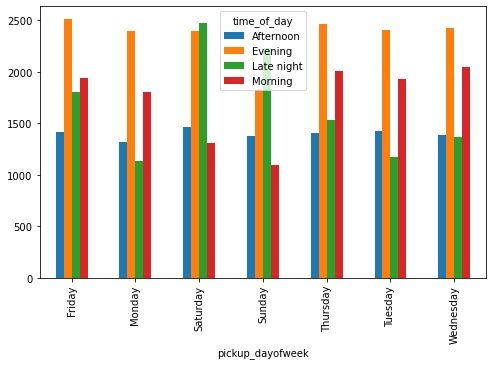

In [16]:
pp=taxi_fare.pivot_table(index="pickup_dayofweek",columns="time_of_day",values="pickup_day_no",aggfunc="count")
pp.plot(kind="bar",figsize=(8,5))


# Univariate Analysis

In [17]:
import seaborn as sns
day_value=taxi_fare["pickup_dayofweek"].value_counts()
day_value

Friday       7668
Saturday     7630
Thursday     7406
Wednesday    7212
Tuesday      6927
Monday       6639
Sunday       6518
Name: pickup_dayofweek, dtype: int64

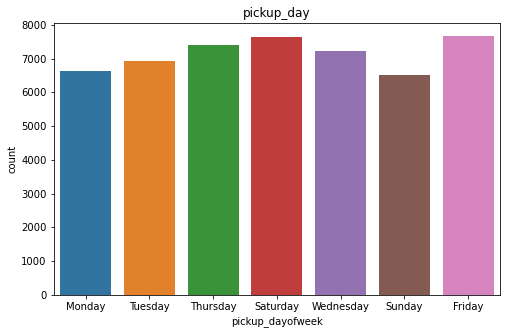

In [18]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title('pickup_day')
ax=sns.countplot(x="pickup_dayofweek",data=taxi_fare,ax=ax)

<AxesSubplot:xlabel='pickup_dayofweek'>

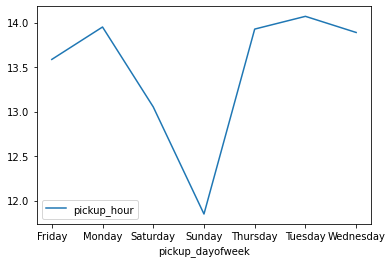

In [19]:
ab=taxi_fare.pivot_table(index="pickup_dayofweek",values="pickup_hour")
ab.plot()

<AxesSubplot:>

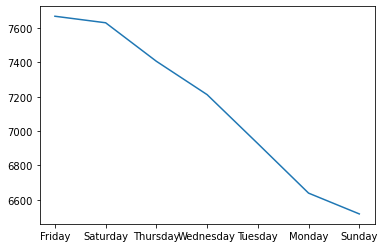

In [65]:
day_value.plot()

<BarContainer object of 4 artists>

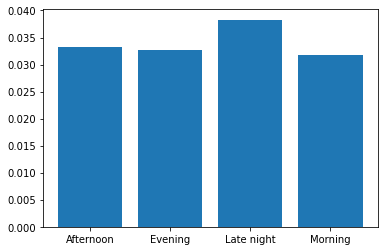

In [75]:
ab=taxi_fare.pivot_table(index="time_of_day",values="total_distance",aggfunc="mean").reset_index()
plt.bar(ab["time_of_day"],ab["total_distance"])

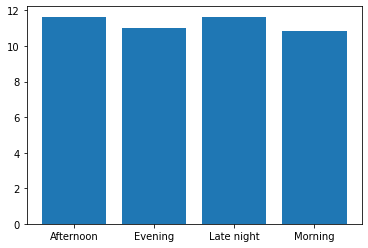

In [20]:
amount_time=taxi_fare.pivot_table(index="time_of_day",values="amount",aggfunc="mean").reset_index()
plt.bar(amount_time["time_of_day"],amount_time["amount"])
plt.show()

In [21]:
taxi_fare.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_time_pickup,pickup_dayofweek,pickup_day_no,pickup_hour,total_distance,time_of_day
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,Monday,0,17,0.009436,Evening
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16+00:00,Tuesday,1,16,0.079696,Evening
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,Thursday,3,0,0.013674,Late night
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,Saturday,5,4,0.025340,Late night
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,Tuesday,1,7,0.019470,Morning


In [ ]:
#xx=taxi_fare.pivot_table(index="",columns="",values="",aggfunc="").reset_index()

In [ ]:
## Splitting amount into parts,and taking only those obsevr of amount that are above 2.5

In [27]:
taxi_fare[taxi_fare["amount"]<2.5].value_counts().sum()

10

In [28]:
taxi_fare1=taxi_fare.loc[taxi_fare["amount"]>=2.5]

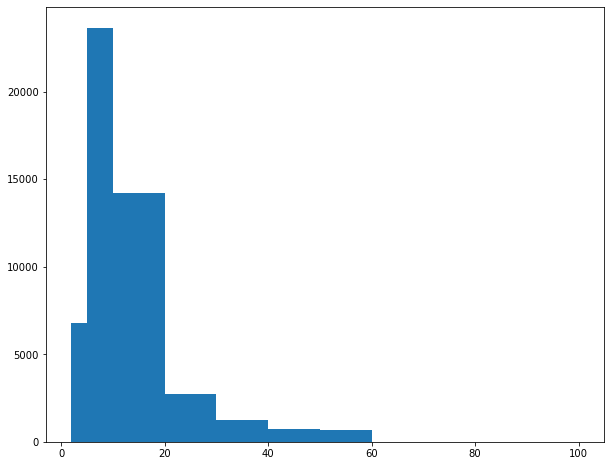

In [29]:
fig,ax=plt.subplots(figsize=(10,8))
ax.hist(taxi_fare1["amount"],bins=[2,5,10,20,30,40,50,60,100])
plt.show()

<AxesSubplot:xlabel='amount', ylabel='pickup_hour'>

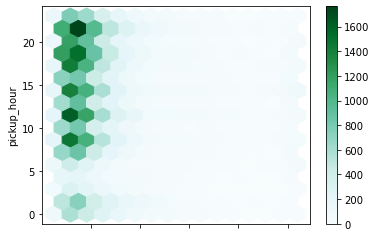

In [64]:
taxi_fare1.plot.hexbin(x="amount",y="pickup_hour",gridsize=15)

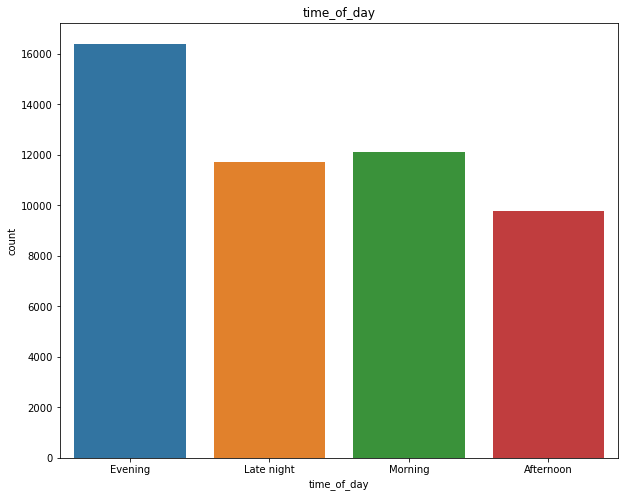

In [54]:
fig,ax=plt.subplots(figsize=(10,8))
ax.set_title("time_of_day")
ax=sns.countplot(x="time_of_day",data=taxi_fare1,ax=ax)

In [65]:
xx=taxi_fare1.pivot_table(index="pickup_dayofweek",columns="time_of_day",values="amount").reset_index()
xx

time_of_day,pickup_dayofweek,Afternoon,Evening,Late night,Morning
0,Friday,11.885117,11.021552,11.609961,10.893973
1,Monday,11.544707,11.106537,12.226569,11.321471
2,Saturday,11.257575,10.666973,11.468406,10.703171
3,Sunday,11.603922,11.164942,11.626248,11.128121
4,Thursday,11.906835,11.481967,12.222679,10.893016
5,Tuesday,11.573223,11.037950,11.351091,10.599611
6,Wednesday,11.784055,10.811762,11.185329,10.548183


In [74]:
taxi_fare1["no_of_passenger"].value_counts()

1    34799
2     7386
4     5457
3     2183
0      165
Name: no_of_passenger, dtype: int64

In [75]:
taxi_fare1["longitude_of_pickup"].value_counts()

 0.000000     955
-73.137393     18
-73.981405      9
-73.978045      8
-73.982930      8
             ... 
-73.987940      1
-73.985475      1
-73.967430      1
-73.890529      1
-73.983024      1
Name: longitude_of_pickup, Length: 33710, dtype: int64

In [80]:
taxi_fare1["latitude_of_pickup"].value_counts()

0.000000     955
41.366138     18
40.756007     10
40.763975      8
40.750300      7
            ... 
40.735152      1
40.730989      1
40.736090      1
40.789126      1
40.764015      1
Name: latitude_of_pickup, Length: 36586, dtype: int64

In [79]:
taxi_fare1["longitude_of_dropoff"].value_counts()

 0.000000     957
-73.137393     12
-73.991512      9
-73.982392      8
-73.980812      8
             ... 
-73.933546      1
-74.008267      1
-73.976036      1
-73.948306      1
-73.989458      1
Name: longitude_of_dropoff, Length: 34874, dtype: int64

In [85]:
taxi_fare1["latitude_of_dropoff"].value_counts()

41.366138    12
40.757407     8
40.761500     8
40.762997     7
40.763492     7
             ..
40.756859     1
40.708729     1
40.789830     1
40.779833     1
40.738242     1
Name: latitude_of_dropoff, Length: 37346, dtype: int64

In [30]:
print(f'Initial number of observations: {taxi_fare1.shape[0]}')


Initial number of observations: 49990


In [31]:
taxi_fare1=taxi_fare1.loc[taxi_fare1["longitude_of_pickup"].between(-75, -72)]
taxi_fare1=taxi_fare1.loc[taxi_fare1["latitude_of_pickup"].between(40, 42)]
taxi_fare1=taxi_fare1.loc[taxi_fare1["longitude_of_dropoff"].between(-75, -72)]
taxi_fare1=taxi_fare1.loc[taxi_fare1["latitude_of_dropoff"].between(40, 42)]
print(f'New number of observations: {taxi_fare1.shape[0]}')
# Remove latitude and longtiude outliers
#data = data.loc[data['pickup_latitude'].between(40, 42)]
#data = data.loc[data['pickup_longitude'].between(-75, -72)]
#data = data.loc[data['dropoff_latitude'].between(40, 42)]
#data = data.loc[data['dropoff_longitude'].between(-75, -72)]

New number of observations: 48944


In [ ]:
## Creating manhattan column by using formula of minkowski_distance

In [32]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)


In [33]:
taxi_fare1['manhattan'] = minkowski_distance(taxi_fare1['longitude_of_pickup'], 
                                       taxi_fare1['latitude_of_pickup'],
                                       taxi_fare1['longitude_of_dropoff'],
                                       taxi_fare1['latitude_of_dropoff'], 1)


In [34]:
taxi_fare1

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_time_pickup,pickup_dayofweek,...,Is_it_Weekend,Is_Starting_month,Is_Mid_month,Is_Ending_month,Morning,Afternoon,Evening,LateNight,Is_Leap,manhattan
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,Monday,...,0,0,1,0,0,0,1,0,0,229.119518
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16+00:00,Tuesday,...,0,1,0,0,0,1,0,0,0,229.488623
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,Thursday,...,0,0,1,0,0,0,0,0,0,229.485812
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,Saturday,...,1,0,0,1,0,0,0,0,1,229.469932
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,Tuesday,...,0,1,0,0,1,0,0,0,0,229.476520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15+00:00,Wednesday,...,0,0,1,0,0,0,0,1,0,229.471396
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18+00:00,Monday,...,0,0,0,1,0,0,1,0,0,229.500931
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00+00:00,Sunday,...,1,0,0,1,0,0,0,0,0,229.499717
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00+00:00,Tuesday,...,0,1,0,0,1,0,0,0,1,229.456766


In [92]:
y=taxi_fare1["amount"]
X=taxi_fare1[["no_of_passenger","total_distance","manhattan"]]

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=88)
rf1=RandomForestRegressor()
rf1.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
print("train R2 ",rf1.score(X_train,y_train))
print("train R2 ",rf1.score(X_test,y_test))

train R2  0.9698901514794324
train R2  0.7973064562670058


In [96]:
help(rf1)

Help on RandomForestRegressor in module sklearn.ensemble._forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ---------

In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
taxi_fare2=taxi_fare1.drop(columns=["date_time_of_pickup","unique_id","pickup_dayofweek","date_time_pickup","year","day_of_month","pickup_hour"])

In [40]:
y=taxi_fare2["amount"]
X=taxi_fare2.drop(columns=["amount"])

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=88)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
print("train R2 ",rf.score(X_train,y_train))
print("train R2 ",rf.score(X_test,y_test))

train R2  0.9749094652837311
train R2  0.8412620035743272


In [44]:
from sklearn.model_selection import GridSearchCV
parameters={
"n_estimators":[20,50],
"criterion":["mse"],
"max_depth":[3,5,7],
#"min_samples_split":[2,4,6],
#"min_samples_leaf":[2,4,6]
}
rf2=RandomForestRegressor()
rf_gs=GridSearchCV(estimator=rf2,param_grid=parameters,scoring="accuracy",n_jobs=-1,cv=10,verbose=1)
rf_gs.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [3, 5, 7],
                         'n_estimators': [20, 50]},
             scoring='accuracy', verbose=1)

In [45]:
rf_gs.best_params_

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 20}

In [46]:
rf_gs.best_score_

nan

In [45]:
rff=RandomForestRegressor(criterion= 'mse', max_depth= 3, n_estimators= 20)
rff.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=20)

In [46]:
rff.score(X_train,y_train)

0.7809779973844078

In [47]:
rff.score(X_test,y_test)

0.7930957555894922